In [1]:
import numpy as np
import pandas as pd

In [2]:
from database.database_parser import create_connection
from database.database_parser import select_curr_solution

test_connection = create_connection('../database/abacus_database.db')

In [17]:
from database.database_parser import select_price_data


def generate_volatility(params, data):
    volatility = []
    n_observations = len(data)
    initial_squared_vol_estimate = (params[0]
                                        + params[1] * (data[0] ** 2)
                                        + params[3] * (data[0] ** 2) * np.where(data[0] < 0, 1, 0)
                                        + params[2] * (data[0] ** 2))
    current_squared_vol_estimate = initial_squared_vol_estimate

    for i in range(0, n_observations):
        volatility.append(np.sqrt(current_squared_vol_estimate))
        current_squared_vol_estimate = (params[0] + params[1] * (data[i - 1] ** 2)
                                            + params[3] * (data[i - 1] ** 2) * np.where(data[i - 1] < 0, 1, 0)
                                            + params[2] * current_squared_vol_estimate)

    return volatility

def get_volatility(asset: str):
    opt_sol = select_curr_solution(test_connection, asset)
    adj_close = select_price_data(test_connection, asset)
    log_returns = np.array(np.log(adj_close / adj_close.shift(1))[1:])
    volatility = generate_volatility(params=opt_sol, data=log_returns)

    print(len(adj_close.index[1:]))
    df = pd.DataFrame(index=adj_close.index[1:], data=generate_volatility(params=opt_sol, data=log_returns))
    return df

522


<AxesSubplot:xlabel='date'>

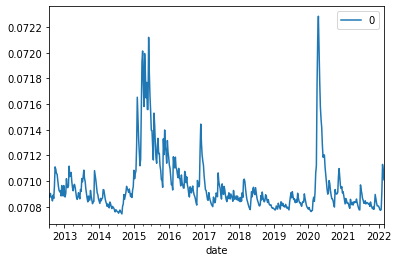

In [22]:
get_volatility("EUR")[20:].plot()

In [49]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use(['science', 'notebook', 'grid'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


522


/var/folders/d7/rpl_88f12ln2z1s2h4m9ybjm0000gn/T/ipykernel_24394/1056095887.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


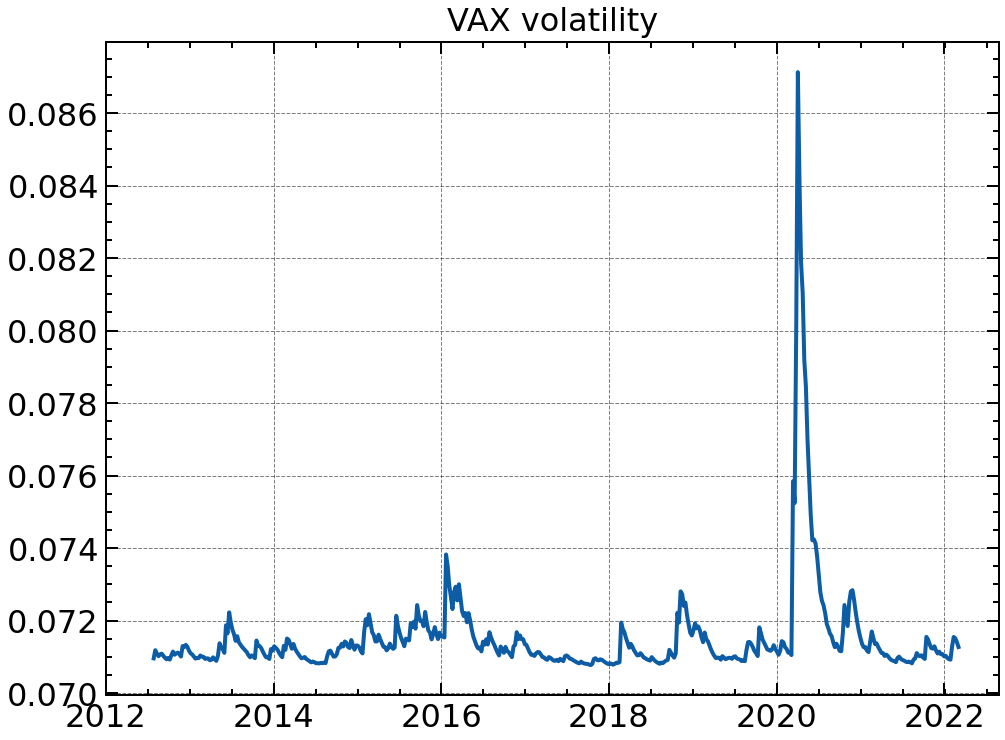

In [60]:
asset = "VAS"

fig, ax = plt.subplots()

data = get_volatility(f"{asset}")[20:]

ax.plot(data.index, data[0])
ax.set_title(f"VAX volatility")
ax.set_xticks(ax.get_xticks()[::2])
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)

plt.savefig(f"{asset}.eps")
fig.show()